In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('faithful.csv')

In [3]:
df.head(4)

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62


Rename the column

In [4]:
df.columns

Index([u'Unnamed: 0', u'eruptions', u'waiting'], dtype='object')

In [7]:
df = df.rename(columns={'Unnamed: 0':'Serial'})
df.head(4)

,Serial,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62


Just how many unique values do we have for the waiting column?

In [8]:
len(df['waiting'].unique())

51

In [9]:
len(df)

272

A more sophisticated way of understanding the data

In [10]:
df['waiting'].describe()

count    272.000000
mean      70.897059
std       13.594974
min       43.000000
25%       58.000000
50%       76.000000
75%       82.000000
max       96.000000
Name: waiting, dtype: float64

How long was the longest wait? Notice this is already in the above

In [11]:
df['waiting'].max()

96

How long was the longest eruption?

In [12]:
df['eruptions'].max()

5.0999999999999996

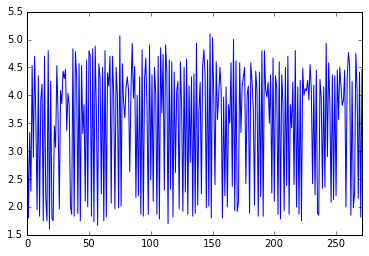

In [13]:
df['eruptions'].plot()

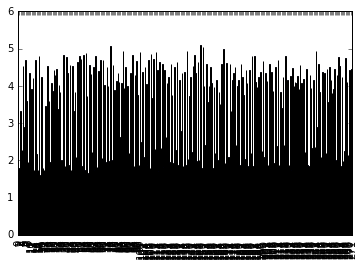

In [14]:
df['eruptions'].plot.bar()

In [15]:
df['eruptions'].mean()

3.4877830882352936

Let's try to categorize the data

In [16]:
df['eruptions'].describe() # min, max?

count    272.000000
mean       3.487783
std        1.141371
min        1.600000
25%        2.162750
50%        4.000000
75%        4.454250
max        5.100000
Name: eruptions, dtype: float64

In [25]:
bins = np.linspace(0, 6, 7, dtype=np.int16)
bins

array([0, 1, 2, 3, 4, 5, 6], dtype=int16)

In [41]:
names = ['very short', 'short', 'medium', 'medium long', 'long', 'very long'] # Notice there are 6 not 7

In [42]:
data = pd.cut(df['eruptions'], bins, labels=names)

In [43]:
type(data)

pandas.core.series.Series

In [44]:
data.head(4)

0    medium long
1          short
2    medium long
3         medium
Name: eruptions, dtype: category
Categories (6, object): [very short < short < medium < medium long < long < very long]

In [34]:
len(data)

272

In [45]:
df['eruption type'] = data

In [46]:
df.head(4)

,Serial,eruptions,waiting,eruption type
0,1,3.600,79,medium long
1,2,1.800,54,short
2,3,3.333,74,medium long
3,4,2.283,62,medium


Let's try to get a histogram, notice not all histograms make sense

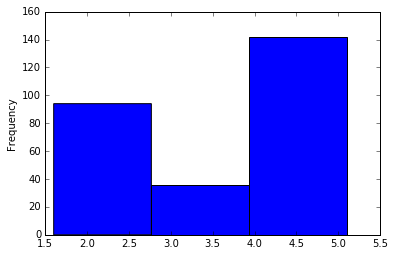

In [47]:
df['eruptions'].plot.hist(bins=3)

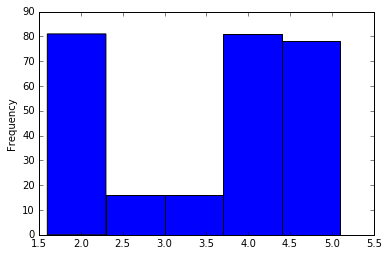

In [48]:
df['eruptions'].plot.hist(bins=5)

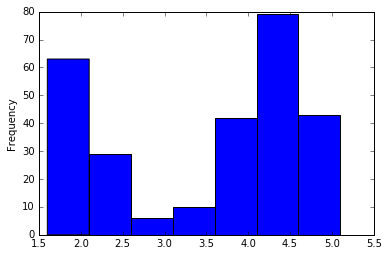

In [50]:
df['eruptions'].plot.hist(bins=7)

How about using the labels in our category?

In [57]:
df[['eruptions', 'eruption type']].groupby(['eruption type']).agg(['count'])

,eruptions
,count
eruption type,
very short,0
short,55
medium,42
medium long,43
long,129
very long,3


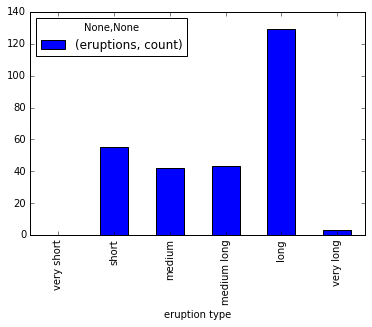

In [64]:
df[['eruptions', 'eruption type']].groupby(['eruption type']).agg(['count']).plot.bar()